# Import bibliotek oraz wczytanie danych

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
import random
import scipy.sparse as sp
# from libreco.data import random_split, DatasetPure, split_by_ratio_chrono
# from libreco.algorithms import LightGCN
# from libreco.evaluation import evaluate

In [2]:
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/WB_OLX/interactions.csv")

Mounted at /content/drive


In [3]:
# df = pd.read_csv("C:\\Users\\marci\\OneDrive\\Pulpit\\archive\\interactions.csv",
#                  #"C:\\Users\\fpazi\\Desktop\\projekty\\olx\\interactions.csv",
#                  sep=',')

## Basic statistics

In [4]:
df['event'].value_counts()

click                    58817263
contact_phone_click_1     1721338
bookmark                  1644602
chat_click                1399051
contact_chat               948470
contact_partner_click      459305
contact_phone_click_2      444497
contact_phone_click_3       67675
Name: event, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65502201 entries, 0 to 65502200
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   user       int64 
 1   item       int64 
 2   event      object
 3   timestamp  int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ GB


In [6]:
n_users = df['user'].nunique()
n_items = df['item'].nunique()

print('Number of users: ', n_users)
print('Number of items: ', n_items)

Number of users:  3295942
Number of items:  185395


In [7]:
n_events_per_user = df.groupby('user').size()
n_events_per_item = df.groupby('item').size()

print('Average number of events per user: ', round(np.mean(n_events_per_user), 2), ' with a standard deviation of ', np.std(n_events_per_user))
print('Average number of events per item: ', round(np.mean(n_events_per_item), 2), ' with a standard deviation of ', np.std(n_events_per_item))

Average number of events per user:  19.87  with a standard deviation of  47.76236318850431
Average number of events per item:  353.31  with a standard deviation of  624.7732106025461


In [8]:
print('Median number of events per user: ', round(np.median(n_events_per_user), 2))
print('Median number of events per item: ', round(np.median(n_events_per_item), 2))

Median number of events per user:  6.0
Median number of events per item:  137.0


## Number of interactions per user

In [9]:
n_events_per_user.describe()

count    3.295942e+06
mean     1.987359e+01
std      4.776237e+01
min      1.000000e+00
25%      2.000000e+00
50%      6.000000e+00
75%      1.800000e+01
max      1.310000e+03
dtype: float64

[Text(0.5, 1.0, 'ECDF of number of interactions per user')]

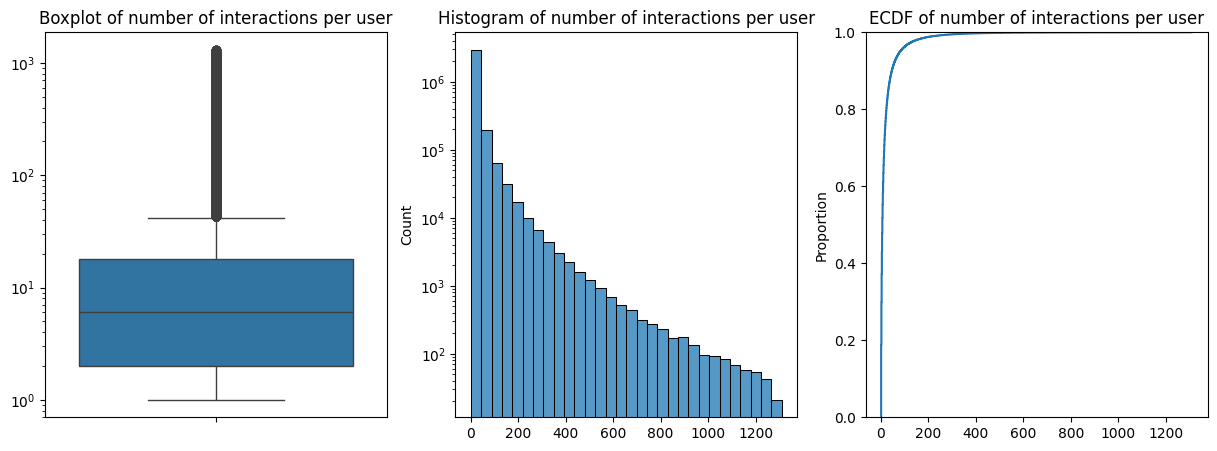

In [25]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))
h1 = sns.boxplot(n_events_per_user, ax=axs[0])
h1.set_yscale('log')
h1.set(title = 'Boxplot of number of interactions per user')
h2=sns.histplot(n_events_per_user, bins=30, ax=axs[1])
h2.set_yscale('log')
h2.set(title = 'Histogram of number of interactions per user')
h3 = sns.ecdfplot(n_events_per_user)
h3.set(title = 'ECDF of number of interactions per user')

## Number of interactions per item

In [ ]:
n_events_per_item.describe()

count    185395.000000
mean        353.311583
std         624.774896
min           1.000000
25%           3.000000
50%         137.000000
75%         428.000000
max       15480.000000
dtype: float64

[Text(0.5, 1.0, 'ECDF of number of interactions per item')]

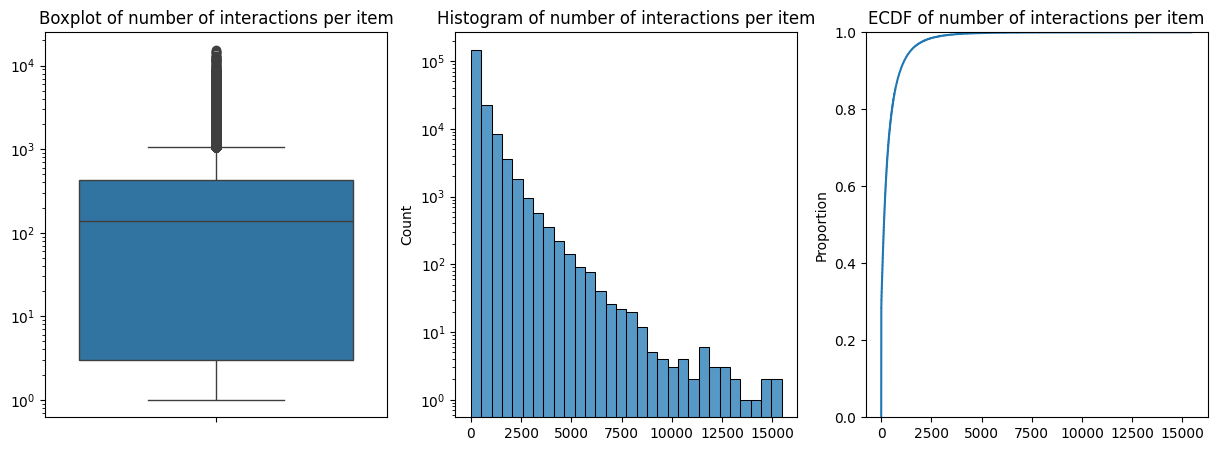

In [26]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))
h1 = sns.boxplot(n_events_per_item, ax=axs[0])
h1.set_yscale('log')
h1.set(title = 'Boxplot of number of interactions per item')
h2=sns.histplot(n_events_per_item, bins=30, ax=axs[1])
h2.set_yscale('log')
h2.set(title = 'Histogram of number of interactions per item')
h3 = sns.ecdfplot(n_events_per_item)
h3.set(title = 'ECDF of number of interactions per item')